In [146]:
import otter
# nb_name should be the name of your notebook without the .ipynb extension
nb_name = "p9"
py_filename = nb_name + ".py"
grader = otter.Notebook(nb_name + ".ipynb")

In [147]:
import p9_test

In [148]:
# PLEASE FILL IN THE DETAILS
# Enter none if you don't have a project partner

# project: p9
# submitter: 9084348326
# partner: Risius

# Project 9: Analyzing the Movies

## Learning Objectives:

In this project, you will demonstrate your ability to:
- Use `matplotlib` to plot bar graphs and visualize statistics
- Process data using dictionaries and lists that you build
- Implement binning by writing algorithms that create dictionaries
- Custom sort a list using the keyword parameter `key`'s argument.

Please go through [Lab-P9](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-s23-projects/-/tree/main/lab-p9) before starting this project. The lab introduces some useful techniques necessary for this project.

<h2 style="color:red">Warning (Note on Academic Misconduct):</h2>

**IMPORTANT**: P8 and P9 are two parts of the same data analysis. You **cannot** switch project partners between these two projects. That is if you partnered up with someone for P8, you have to work on P9 with the **same partner**. Now may be a good time to review [our course policies](https://cs220.cs.wisc.edu/s23/syllabus.html).

## Testing your code:

Along with this notebook, you must have downloaded the file `p9_test.py`. If you are curious about how we test your code, you can explore this file, and specifically the value of the variable `expected_json`, to understand the expected answers to the questions.

**Important:** `p9_test.py` **cannot** verify your answers when the output is an image. Your **plots** will be **checked** by the Gradescope autograder, so you must **manually** confirm that your plots look correct by comparing with the images provided in the notebook.

## Introduction:

In P8, you created very useful helper functions to parse the raw IMDb dataset. You also created useful data structures to store the data. In this project, you will be building on the work you did in P8 to analyze your favorite movies. This is a shorter project than usual, and **P9 will only have 10 questions for you to solve**.

## Data:

In P9, you will be analyzing the same dataset that you worked with in P8. You may download the files fresh, or just copy/paste the datasets from your P8 directory.

## Project Requirements:

You **may not** hardcode indices or the lengths of lists in your code. We'll **manually deduct** points from your autograder score on Gradescope during code review.

**Store** your final answer for each question in the **variable specified for each question**. This step is important because Otter grades your work by comparing the value of this variable against the correct answer.

For some of the questions, we'll ask you to write (then use) a function to compute the answer. If you compute the answer **without** creating the function we ask you to write, the Gradescope autograder will **deduct** points from your public score, even if the way you did it produced the correct answer.

Required Functions:
- `bucketize`

In this project, you will also be required to define certain **data structures**. If you do not create these data structures exactly as specified, we'll **deduct** points from your public score on Gradescope, even if the way you did it produced the correct answer for the questions.

Required Data Structures:
- `movies`
- `cast_buckets`
- `director_buckets`
- `genre_buckets`
- `year_buckets`

You are only allowed to define these data structures **once** and we'll **deduct** points from your public score on Gradescope if you redefine the values of these variables.

In this project, you will be asked to create **lists** of movies. For all such questions, **unless it is explicitly mentioned otherwise**, the movies should be in the **same order** as in the `movies.csv` file. Similarly, for each movie, the **list** of `genres`, `directors`, and `cast` members should always be in the **same order** as in the `movies.csv` file.

Students are only allowed to use Python commands and concepts that have been taught in the course prior to the release of P9. We will **manually deduct** points from your autograder score on Gradescope otherwise.

For more details on what will cause you to lose points during code review and specific requirements, please take a look at the [Grading rubric](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-s23-projects/-/blob/main/p9/rubric.md).

## Project Questions and Functions:

In [149]:
# it is considered a good coding practice to place all import statements at the top of the notebook
# please place all your import statements in this cell if you need to import any more modules for this project
import csv
import pandas

## Loading the Movies Data

For all these questions, we will be looking at the movies in `mapping.csv` and `movies.csv`. You can load the list of movies using the functions you wrote in the last project.

Copy the functions you wrote in `p8.ipynb` to `p9.ipynb` to read the movies data. The functions you should include are `process_csv`, `get_mapping`, `get_raw_movies`, and `get_movies` along with any helper functions you used to write these. Do **not** copy/paste `find_specific_movies` here. Later in P9, we will provide you with a simpler version of that function, which does not require the use of the `copy` module.

In [150]:
# copy/paste the definition of process_csv from previous projects (p6 or p7)
# copy/paste the definitions of get_mapping, get_raw_movies, get_movies from p8.ipynb
# as well as any helper functions used by these functions here
def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data

In [151]:
def get_mapping(path):
    mapping_rows = process_csv(path)
    mapping_rows
    mapping_dict = {}
    for idx in range(len(mapping_rows)):
        mapping_dict[mapping_rows[idx][0]] = mapping_rows[idx][1]
        
    return mapping_dict

In [152]:
def get_raw_movies(path):
    file_data = process_csv(path)
    csv_header = file_data[0]
    csv_rows = file_data[1:]
    raw_movies_list = []
    
    for ID in csv_rows:
        movie = {}
        movie["title"] = ID[csv_header.index("title")]
        movie["year"] = int(ID[csv_header.index("year")])
        movie["duration"] = int(ID[csv_header.index("duration")])
        movie["genres"] = ID[csv_header.index("genres")].split(', ')
        movie["rating"] = float(ID[csv_header.index("rating")])
        movie["directors"] = ID[csv_header.index("directors")].split(', ')
        movie["cast"] = ID[csv_header.index("cast")].split(', ')
        raw_movies_list.append(movie)
        
    return raw_movies_list

In [153]:
def get_movies(movies_path, mapping_path):
    raw_movies_list = get_raw_movies(movies_path)
    mapping_dict = get_mapping(mapping_path)
    movies_list = []
    
    
    for movie in raw_movies_list:
        directors = []
        cast = []
        movie["title"] = mapping_dict[movie['title']]
        for idx in range(len(movie['directors'])):
            directors.append(mapping_dict[movie['directors'][idx]])
        movie['directors'] = directors
        for idx in range(len(movie['cast'])):
            cast.append(mapping_dict[movie['cast'][idx]])
        movie['cast'] = cast
        movies_list.append(movie)
    
    return movies_list

Now, you can use `get_movies` to read the data in `movies.csv` and `mapping.csv` as you did in P8.

In [154]:
# create a list of dictionaries named 'movies' to store the data in 'movies.csv' and 'mapping.csv' as in p8
# do NOT display the value of this variable anywhere in this notebook

movies = get_movies('movies.csv', 'mapping.csv')
len(movies)

202416

There should be *202416* **dictionaries** in the **list** `movies` and the first entry of `movies` should be a **dictionary** that looks as follows:

```python
{'title': 'Il ragioniere della mafia',
  'year': 2013,
  'duration': 75,
  'genres': ['Action', 'Crime', 'Romance'],
  'rating': 6.4,
  'directors': ['Federico Rizzo'],
  'cast': ['Lorenzo Flaherty',
   'Tony Sperandeo',
   'Ernesto Mahieux',
   'Francesca Testasecca']}
```

**Warning:** At this stage, it is expected that the function `get_movies` works correctly, and that `movies` is defined as it was in P8. If not, your code will run into issues in P9. So, make sure that this function works properly before you start P9. You can do that by **inserting a new cell** in Jupyter below this cell and verifying that the size of your variable `movies`, and that the first **dictionary** in `movies` is as it should be.

Also, just like in P8, delete any cells displaying the whole of `movies` data structure before turning in p9.ipynb.

Now, copy over the functions `plot_dict`, `median` and `year_to_decade` from Lab-P9.

In [155]:
# copy/paste the definitions of plot_dict, median, year_to_decade from "Lab-P9
# as well as any helper functions used by these functions here
def plot_dict(d, label="Please Label Me!"):
    """plot_dict(d, label) creates a bar plot using the 
    dictionary 'd' and labels the y-axis as 'label'"""
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)
    
def median(items):
    sorted_list = sorted(items)
    list_len = int(len(items))
    if list_len % 2 != 0:
        return sorted_list[int((list_len +1) / 2) - 1]
    else:
        first_middle = sorted_list[int((list_len)/2) -1]
        second_middle = sorted_list[int((list_len)/2)]
        return (first_middle + second_middle) / 2

    
def year_to_decade(year):
    if year % 10 == 0:
        decade = str(year - 9) + ' to ' + str(year)
    else:
        starting_year = year - ((year % 10) - 1)
        ending_year = starting_year + 9
        decade = str(starting_year) + ' to ' + str(ending_year)
    return decade
    


In P8, you were provided with a function `find_specific_movies` which functioned as some sort of a 'search bar' for the movies dataset. However, in order to use that function properly, you had to use the `copy` module to pass a *copy* of your list of movies to `find_specific_movies`. Making copies frequently is **not** a good coding practice. For this project, we will provide **a new version** of `find_specific_movies` that does **not** require using `copy`. Please go through the following function:

In [156]:
# modified find_specific_movies (doesn't require using copy module)
def find_specific_movies(movies, keyword):
    """
    find_specific_movies(movies, keyword) takes a list of movie dictionaries 
    and a keyword; it returns a list of movies that contain the keyword
    in either its title, genre, cast or directors.
    """
    movies_with_keyword = []
    for movie in movies:
        if (keyword in movie['title']) or (keyword in movie['genres']) \
            or (keyword in movie['directors']) or (keyword in movie['cast']):
            movies_with_keyword.append(movie)
    return movies_with_keyword

**Important:** **Even when you are not explicitly prompted to do so, using the `find_specific_movies` function cleverly can simplify your code significantly. Keep an eye out for how you can simplify your code by making use of `find_specific_movies`.**

### Analyzing the Movies data

**Question 1:** What is the **median** `rating` of the *Star Wars* movies directed by *George Lucas*?

You **must** make multiple calls to the `find_specific_movies` function to identify the movies which have *Star Wars* as a substring of the `title` **and** also have *George Lucas* as one of the `directors`.

In [157]:
# compute and store the answer in the variable 'median_sw_rating', then display it
ratings_list = []
for movie in movies:
    if "Star Wars" in movie["title"] and "George Lucas" in movie["directors"]:
        ratings_list.append(movie['rating'])

median_sw_rating = median(ratings_list)
median_sw_rating

7.1

In [158]:
grader.check("q1")

q1 results: All test cases passed!

**Question 2:** Among all the *Spider-Man* movies, which ones are the **highest** rated?

Your output **must** be a **list** of **dictionaries**. You **must** use `find_specific_movies` to identify all movies which have *Spider-Man* as a substring of their `title`.

**Hint:** You could first find the **highest** `rating` that any *Spider-Man* movie received, and then find all the *Spider-Man* movies that received that `rating`.

In [159]:
# compute and store the answer in the variable 'highest_rated_spider_man_movies', then display it
max_rating = None 
for movie in movies:
    if "Spider-Man" in movie["title"]:
        if max_rating == None or movie["rating"] > max_rating:
            max_rating = movie["rating"]
highest_rated_spider_man_movies = []
for movie in movies:
    if "Spider-Man" in movie["title"]:
        if movie["rating"] == max_rating:
            highest_rated_spider_man_movies.append(movie)
highest_rated_spider_man_movies

[{'title': 'Spider-Man: Into the Spider-Verse',
  'year': 2018,
  'duration': 117,
  'genres': ['Action', 'Adventure', 'Animation'],
  'rating': 8.4,
  'directors': ['Bob Persichetti', 'Peter Ramsey', 'Rodney Rothman'],
  'cast': ['Shameik Moore',
   'Jake Johnson',
   'Hailee Steinfeld',
   'Mahershala Ali']},
 {'title': 'Spider-Man Venom Saga',
  'year': 2005,
  'duration': 100,
  'genres': ['Animation'],
  'rating': 8.4,
  'directors': ['Bob Richardson'],
  'cast': ['James Avery',
   'Sara Ballantine',
   'John Beard',
   'Roscoe Lee Browne']}]

In [160]:
grader.check("q2")

q2 results: All test cases passed!

### Function 1: `bucketize(movies_list, category)` 

This function should take in a **list** of movie **dictionaries** as well as a **category** (i.e. `title`, `year`, `duration`, `genres`, `rating`, `directors`, or `cast`), and *bucketize* the **list** of movie **dictionaries** by this **category**.

For example, the output of `bucketize(movies, 'rating')` should be a **dictionary** so that all the unique values of `rating` of the movies in `movies` are the **keys** and the correspoding **values** would be a **list** of all movie **dictionaries** with that rating (e.g., the value of the key *6.4* should be the **list** of movie dictionaries with `rating` of *6.4*).

The output of `bucketize(movies, 'rating')` should look like this:

```python
{6.4: [{'title': 'Il ragioniere della mafia',
   'year': 2013,
   'duration': 75,
   'genres': ['Action', 'Crime', 'Romance'],
   'rating': 6.4,
   'directors': ['Federico Rizzo'],
   'cast': ['Lorenzo Flaherty',
    'Tony Sperandeo',
    'Ernesto Mahieux',
    'Francesca Testasecca']},
  {'title': 'Os Toiros de Mary Foster',
   'year': 1972,
   'duration': 110,
   'genres': ['Drama'],
   'rating': 6.4,
   'directors': ['Henrique Campos'],
   'cast': ['Catarina Avelar',
    'António Montez',
    'Anne Butler',
    'Amílcar Botica',
    'Helena Isabel']},
       ...
      ],
}
```

Similarly, the output of `bucketize(movies, 'cast')` should be a **dictionary** so that all the unique `cast` members of the movies in `movies` are the **keys** and the correspoding **values** would be a **list** of all movie **dictionaries** with that cast member as one of their `cast` (e.g., the value of the key *Kate Winslet* should be the **list** of movie dictionaries with *Kate Winslet* as one of their `cast` members).

The output of `bucketize(movies, 'cast')` should look like this:

```python
{'Lorenzo Flaherty': [{'title': 'Il ragioniere della mafia',
   'year': 2013,
   'duration': 75,
   'genres': ['Action', 'Crime', 'Romance'],
   'rating': 6.4,
   'directors': ['Federico Rizzo'],
   'cast': ['Lorenzo Flaherty',
    'Tony Sperandeo',
    'Ernesto Mahieux',
    'Francesca Testasecca']},
  {'title': 'Voices from Beyond',
   'year': 1994,
   'duration': 91,
   'genres': ['Horror', 'Mystery', 'Thriller'],
   'rating': 5.0,
   'directors': ['Lucio Fulci'],
   'cast': ['Duilio Del Prete',
    'Karina Huff',
    'Pascal Persiano',
    'Lorenzo Flaherty']},
  {'title': 'Bologna due agosto: I giorni della collera',
   'year': 2014,
   'duration': 99,
   'genres': ['Drama'],
   'rating': 6.7,
   'directors': ['Giorgio Molteni', 'Daniele Santamaria Maurizio'],
   'cast': ['Marika Frassino',
    'Giuseppe Maggio',
    'Lorenzo Flaherty',
    'Martina Colombari']},
     ...],
 'Tony Sperandeo': [{'title': 'Il ragioniere della mafia',
   'year': 2013,
   'duration': 75,
   'genres': ['Action', 'Crime', 'Romance'],
   'rating': 6.4,
   'directors': ['Federico Rizzo'],
   'cast': ['Lorenzo Flaherty',
    'Tony Sperandeo',
    'Ernesto Mahieux',
    'Francesca Testasecca']},
    ...],
 ...
} 
```

**Hints:** Note that depending on whether or not the `category` represents a **list** or not, your function will have to behave differently. In P8, you created a function `bucketize_by_genre` that *bucketized* the list of movies by their genre. Take a moment to find that function; it will help you here. Also, take a moment to look at the buckets you made in Lab-P9.

In [161]:
# replace the ... with your code to finish the definition of bucketize

def bucketize(movie_list, category):
    buckets = {}
    for movie in movie_list:
        category_value = movie[category] #TODO: access the category value from a movie
        # TODO: bucketize depending on the type of `category_value`
        if type(category_value) == list:
            for item in category_value:
                if item not in buckets:
                    buckets[item] = []
                buckets[item].append(movie)
        else:
            if category_value not in buckets:
                buckets[category_value] = []
            buckets[category_value].append(movie)
    return buckets

**Important:** Just like `get_movies`, `bucketize` is quite a time-consuming function to run. Hence, you do **not** want to call `bucketize` on the same list of movies and category **more than once**. Throughout the project, we will frequently use bucketized lists of movies organized by their `cast`, `directors`, `genre`, and `year`. Rather than calling `bucketize` several times, we will store the bucketized lists in the following variables:

In [162]:
# define buckets for categories mentioned below, but do NOT display any of them

# bucketize the full list of movies by their cast.
cast_buckets = bucketize(movies, "cast")
# bucketize the full list of movies by their directors.
director_buckets = bucketize(movies, "directors")
# bucketize the full list of movies by their genre.
genre_buckets = bucketize(movies, "genres")
# bucketize the full list of movies by their year.
year_buckets = bucketize(movies, "year")


Even when you are not explicitly prompted to do so, using these data structures and the `bucketize` function cleverly can simplify your code significantly. Keep an eye out for how you can simplify your code by making use of these data structures and the `bucketize` function.

Remember, you can still use the `bucketize` function on a subset of the `movies` data structure (i.e. not the whole `movies` dataset). You are **not** limited to only using the variables defined above.

**Question 3:** List the movies that *Michelle Yeoh* was `cast` in?

Your output **must** be a **list** of **dictionaries**. You **must** answer this question by accessing the **value** of the correct **key** from the correct **bucket** defined in the previous cell.

In [163]:
# compute and store the answer in the variable 'yeoh_movies', then display it
yeoh_movies = cast_buckets["Michelle Yeoh"]
yeoh_movies

[{'title': 'Crouching Tiger, Hidden Dragon',
  'year': 2000,
  'duration': 120,
  'genres': ['Action', 'Adventure', 'Drama'],
  'rating': 7.9,
  'directors': ['Ang Lee'],
  'cast': ['Chow Yun-Fat', 'Michelle Yeoh', 'Ziyi Zhang', 'Chang Chen']},
 {'title': 'Babylon A.D.',
  'year': 2008,
  'duration': 90,
  'genres': ['Action', 'Adventure', 'Sci-Fi'],
  'rating': 5.5,
  'directors': ['Mathieu Kassovitz'],
  'cast': ['Vin Diesel',
   'Michelle Yeoh',
   'Mélanie Thierry',
   'Gérard Depardieu']},
 {'title': 'Wing Chun',
  'year': 1994,
  'duration': 96,
  'genres': ['Action', 'Comedy', 'Drama'],
  'rating': 7.0,
  'directors': ['Woo-Ping Yuen'],
  'cast': ['Michelle Yeoh',
   'Donnie Yen',
   'King-Tan Yuen',
   'Catherine Yan Hung']},
 {'title': 'Crouching Tiger, Hidden Dragon: Sword of Destiny',
  'year': 2016,
  'duration': 96,
  'genres': ['Action', 'Adventure', 'Drama'],
  'rating': 6.1,
  'directors': ['Woo-Ping Yuen'],
  'cast': ['Donnie Yen',
   'Michelle Yeoh',
   'Harry Shum Jr

In [164]:
grader.check("q3")

q3 results: All test cases passed!

**Question 4:** **Plot** the **number** of movies in each *genre* as a **bar graph**.

You **must** first compute a **dictionary** which maps each **genre** to the **number** of movies in that **genre**.

In [165]:
# first compute and store the dictionary in the variable 'genre_num', then display it
# do NOT plot just yet
genre_num= {}

for genre in genre_buckets:
    genre_num[genre] = len(genre_buckets[genre])

genre_num 

{'Action': 23975,
 'Crime': 21265,
 'Romance': 27456,
 'Comedy': 58377,
 'Drama': 108544,
 'Documentary': 10366,
 'Music': 4845,
 'Mystery': 9707,
 'Adventure': 14929,
 'Animation': 3856,
 'Family': 9142,
 'Western': 4591,
 'Thriller': 20583,
 'Sci-Fi': 5764,
 'Biography': 5065,
 'History': 5272,
 'Fantasy': 7221,
 'Horror': 16971,
 'Musical': 5264,
 'War': 4900,
 'Sport': 2190,
 'Film-Noir': 856,
 'News': 153,
 'Reality-TV': 17,
 'Short': 11,
 'Talk-Show': 1}

In [166]:
grader.check("q4")

q4 results: All test cases passed!

Now, **plot** `genre_num` as a **bar graph**.

**Important Warning:** `p9_test.py` can only check that the **dictionary** has the correct key/value pairs, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. The Gradescope autograder will deduct points if your plot is not visible in the **cell below**, or if it is not properly labelled.

Your plot should look like this:

<div>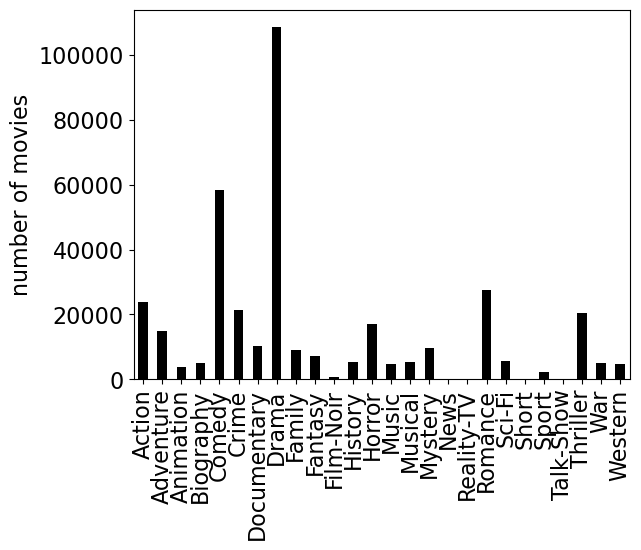</div>

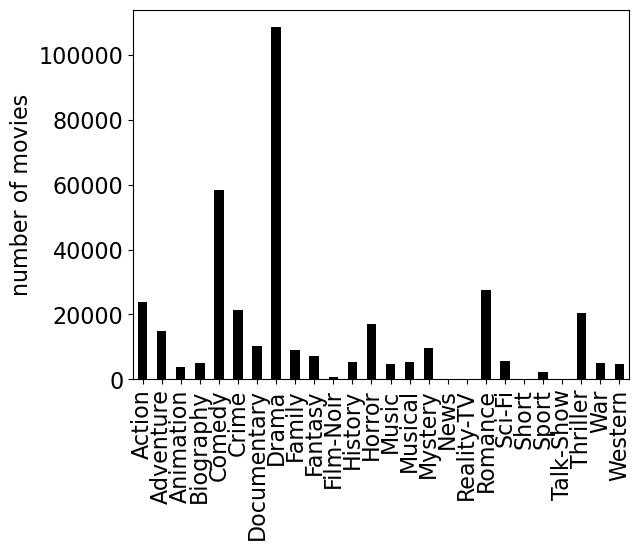

In [167]:
# plot 'genre_num' with the y-axis labelled 'number of movies'

plot_dict(genre_num, "number of movies")

**Food for thought:** Can you tell what the most popular **genres** are from the plot? Do you see anything surprising in this plot?

In [168]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


**Question 5:** **Plot** the **number** of movies **directed** by *Kathryn Bigelow* in each *genre* as a **bar graph**.

You **must** only include those `genres` in which *Kathryn Bigelow* has directed **at least** one movie, in your plot.

You **must** first compute a **dictionary** which maps each **genre** to the **number** of movies in that **genre** directed by *Kathryn Bigelow*.

**Hint:** Think about how you can use functions such as `bucketize` on a subset of movies for the category that you are interested in.

In [169]:
# first compute and store the dictionary in the variable 'kathryn_genres', then display it
# do NOT plot just yet
kathryn_genres = {}

for movie in director_buckets["Kathryn Bigelow"]:
    for genre in movie["genres"]:
        if genre not in kathryn_genres:
            kathryn_genres[genre] = 0
        kathryn_genres[genre] += 1

kathryn_genres

{'Drama': 8,
 'History': 3,
 'Thriller': 4,
 'Crime': 5,
 'Sci-Fi': 1,
 'War': 1,
 'Mystery': 1,
 'Action': 2,
 'Horror': 1}

In [170]:
grader.check("q5")

q5 results: All test cases passed!

Now, **plot** `kathryn_genres` as a **bar graph**.

**Important Warning:** `p9_test.py` can only check that the **dictionary** has the correct key/value pairs, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. The Gradescope autograder will deduct points if your plot is not visible in the **cell below**, or if it is not properly labelled.

Your plot should look like this:

<div>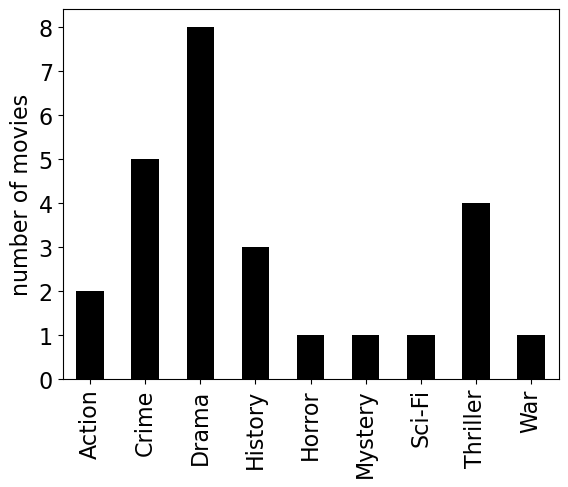</div>

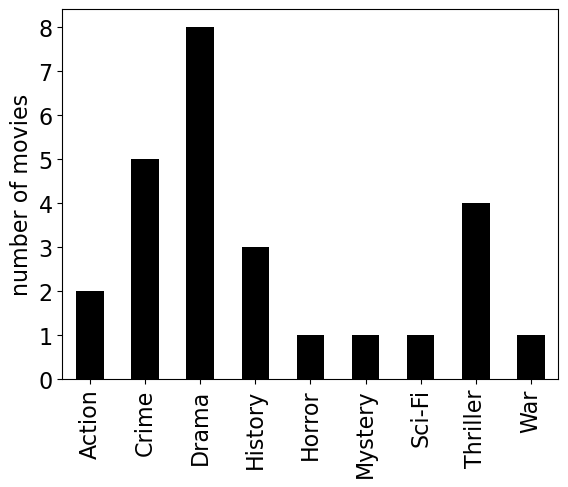

In [171]:
# now plot 'kathryn_genres' with the y-axis labelled 'number of movies'
plot_dict(kathryn_genres, 'number of movies')

**Food for thought:** Can you similarly **plot** the **number** of films directed by your favorite director or starring your favorite cast member in each **genre**?

In [172]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


**Question 6:** **Plot** the **number** of **Sci-Fi** movies released in each *decade* as a **bar graph**.

You **must** first compute a **dictionary** which maps each **decade** to the **number** of movies in released in that **decade**. This dictionary should look like this:

```python
{'2011 to 2020': 2134,
 '1971 to 1980': 377,
 '1981 to 1990': 612,
 '1991 to 2000': 623,
 '2021 to 2030': 396,
 '2001 to 2010': 931,
 '1951 to 1960': 242,
 '1961 to 1970': 320,
 '1931 to 1940': 52,
 '1941 to 1950': 37,
 '1921 to 1930': 19,
 '1911 to 1920': 21}
```

**Hint:** You should use `year_to_decade` function to get the decade for a movie's year

In [175]:
# first compute and store the dictionary in the variable 'sci_fi_decade_mapping', then display it
# do NOT plot just yet
sci_fi_decade_mapping = {}

for idx in range(len(genre_buckets["Sci-Fi"])):
    decade = year_to_decade(genre_buckets["Sci-Fi"][idx]['year'])
    if decade not in sci_fi_decade_mapping:
        sci_fi_decade_mapping[decade] = 1
    else:
        sci_fi_decade_mapping[decade] += 1

sci_fi_decade_mapping

{'2011 to 2020': 2134,
 '1971 to 1980': 377,
 '1981 to 1990': 612,
 '1991 to 2000': 623,
 '2021 to 2030': 396,
 '2001 to 2010': 931,
 '1951 to 1960': 242,
 '1961 to 1970': 320,
 '1931 to 1940': 52,
 '1941 to 1950': 37,
 '1921 to 1930': 19,
 '1911 to 1920': 21}

In [176]:
grader.check("q6")

q6 results: All test cases passed!

Now, **plot** `sci_fi_decade_mapping` as a **bar graph**.

**Important Warning:** `p9_test.py` can only check that the **dictionary** has the correct key/value pairs, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. The Gradescope autograder will deduct points if your plot is not visible in the **cell below**, or if it is not properly labelled.

Your plot should look like this:

<div>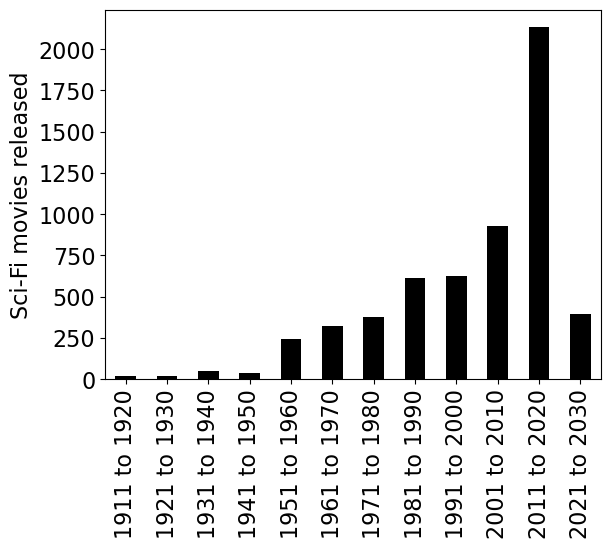</div>

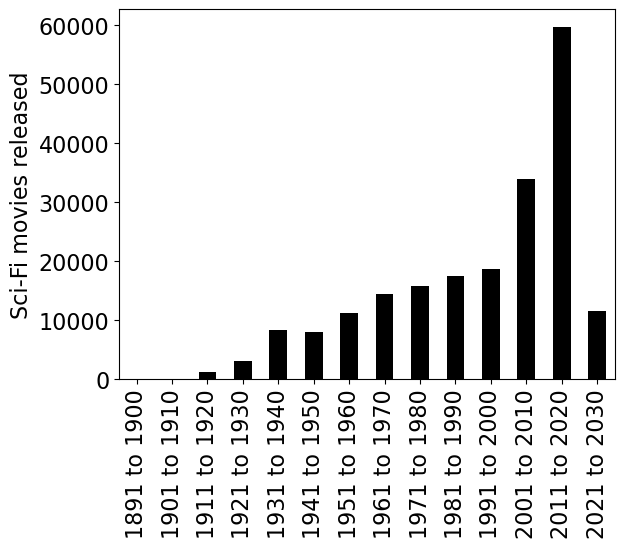

In [76]:
# now plot 'sci_fi_decade_mapping' with the y-axis labelled 'Sci-Fi movies released'
plot_dict(sci_fi_decade_mapping, "Sci-Fi movies released")

**Food for thought:** Can you explain the shape of this plot? Why do you think the number of Sci-Fi movies increased so rapidly over the last decade? If you want, you could compare this plot against plots of other genres (such as `Western` or `Horror`).

In [98]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


**Question 7:** **Plot** the **median** `rating` of movies in each `genre` directed by *Francis Ford Coppola* as a **bar graph**.

You **must** first compute a **dictionary** which maps each **genre** of movies directed by *Francis Ford Coppola* to the **median** `rating` of all movies in that **genre**. Note that your dictionary **must not** contain any genres in which *Francis Ford Coppola* has not directed any movie.

In [128]:
# first compute and store the dictionary in the variable 'coppola_median_genres', then display it
# do NOT plot just yet
coppola_median_genres = {}

for genre in genre_buckets:
    coppola_median_genres[genre] = []
    genre_count = 0
    for idx in range(len(genre_buckets[genre])):
        if "Francis Ford Coppola" in genre_buckets[genre][idx]["directors"]:
            coppola_median_genres[genre].append(genre_buckets[genre][idx]['rating'])
            genre_count += 1
    if genre_count == 0:
        del coppola_median_genres[genre]
    else:
        coppola_median_genres[genre] = median(coppola_median_genres[genre])
        
coppola_median_genres

{'Crime': 7.2,
 'Romance': 6.4,
 'Comedy': 5.949999999999999,
 'Drama': 6.85,
 'Music': 6.5,
 'Mystery': 7.8,
 'Adventure': 4.4,
 'Family': 6.1,
 'Western': 3.0,
 'Thriller': 5.7,
 'Sci-Fi': 4.6,
 'Biography': 6.9,
 'Fantasy': 6.1,
 'Horror': 5.0,
 'Musical': 6.3,
 'War': 7.45}

In [129]:
grader.check("q7")

q7 results: All test cases passed!

Now, **plot** `coppola_median_genres` as a **bar graph**.

**Important Warning:** `p9_test.py` can only check that the **dictionary** has the correct key/value pairs, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. The Gradescope autograder will deduct points if your plot is not visible in the **cell below**, or if it is not properly labelled.

Your plot should look like this:

<div>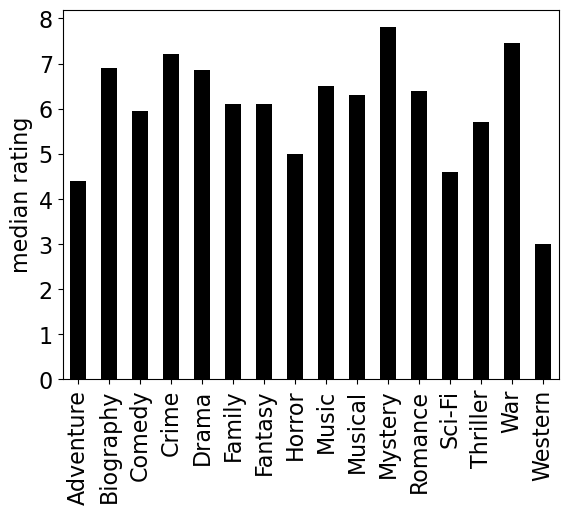</div>

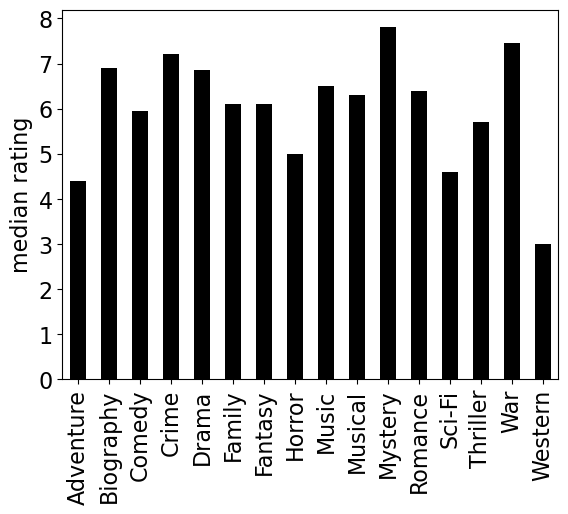

In [130]:
# now plot 'coppola_median_genres' with the y-axis labelled 'median rating'
plot_dict(coppola_median_genres, 'median rating')

**Food for thought:** *Francis Ford Coppola* has directed many critically acclaimed movies such as *The Godfather*, *Apocalypse Now*, and *The Conversation*. Nevertheless, median ratings of his work in the *Adventure*, *Sci-Fi*, *Horror*, and *Western* genres are surprisingly lackluster. Can you explain this inconsistency?

Hint: Take a look at the years of release of the films in these genres. 

In [ ]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


The visualization in Question 7 immediately tells us that the **median** *War* movie directed by *Francis Ford Coppola* is rated higher than the **median** *Western* movie. However, it is a little hard to tell how the **median** *Romance* movie fares against the **median** *Musical* movie. In order to compare the `genres`, it would be useful to **sort** the `genres` by their **median** `rating`.

Refer [Gurmail's](https://canvas.wisc.edu/courses/343490/files/folder/Gurmail_Lecture_Updated/23_Function_References) or [Mike's](https://canvas.wisc.edu/courses/343490/files/folder/Mikes_Lecture_Notes/lec23_function_references) lecture notes on using function references to sort a collection by value(s) related to that collection's elements.

**Question 8:** Produce a **list** of `genres` of films directed by *Francis Ford Coppola* sorted in **decreasing order** of their **median** `rating`.

In [131]:
# compute and store the answer in the variable 'coppola_genres_desc', then display it
coppola_genres_desc = []

def sortFunction(genre):
    return coppola_median_genres[genre]

for genre in coppola_median_genres:
    coppola_genres_desc.append(genre)
    
coppola_genres_desc.sort(key = sortFunction, reverse = True)

coppola_genres_desc

['Mystery',
 'War',
 'Crime',
 'Biography',
 'Drama',
 'Music',
 'Romance',
 'Musical',
 'Family',
 'Fantasy',
 'Comedy',
 'Thriller',
 'Horror',
 'Sci-Fi',
 'Adventure',
 'Western']

In [132]:
grader.check("q8")

q8 results: All test cases passed!

**Question 9:** Produce a **list** of movies directed by *Martin Scorsese* and starring *Robert De Niro* sorted in **increasing** order of their `year` of release.

Your output **must** be a **list** of **dictionaries** of movies having *Martin Scorsese* as one of the `directors`, and *Robert De Niro* as one of the `cast` members, that are **sorted** in **increasing** order of their `year`.

**Hint:** Refer to Task 4.2 in Lab-P9 to understand how to sort a collection using the `key` parameter.

In [133]:
# compute and store the answer in the variable 'scorsese_de_niro', then display it
scorsese_de_niro = []

for idx in range(len(director_buckets["Martin Scorsese"])):
    if director_buckets["Martin Scorsese"][idx] in cast_buckets["Robert De Niro"]:
        scorsese_de_niro.append(director_buckets["Martin Scorsese"][idx])
        
def sortFunction2(movie):
    return movie["year"]

scorsese_de_niro.sort(key = sortFunction2)

scorsese_de_niro

[{'title': 'Mean Streets',
  'year': 1973,
  'duration': 112,
  'genres': ['Crime', 'Drama', 'Thriller'],
  'rating': 7.2,
  'directors': ['Martin Scorsese'],
  'cast': ['Robert De Niro', 'Harvey Keitel', 'David Proval', 'Amy Robinson']},
 {'title': 'Taxi Driver',
  'year': 1976,
  'duration': 114,
  'genres': ['Crime', 'Drama'],
  'rating': 8.2,
  'directors': ['Martin Scorsese'],
  'cast': ['Robert De Niro',
   'Jodie Foster',
   'Cybill Shepherd',
   'Albert Brooks']},
 {'title': 'New York, New York',
  'year': 1977,
  'duration': 155,
  'genres': ['Drama', 'Music', 'Musical'],
  'rating': 6.6,
  'directors': ['Martin Scorsese'],
  'cast': ['Liza Minnelli',
   'Robert De Niro',
   'Lionel Stander',
   'Barry Primus']},
 {'title': 'Raging Bull',
  'year': 1980,
  'duration': 129,
  'genres': ['Biography', 'Drama', 'Sport'],
  'rating': 8.2,
  'directors': ['Martin Scorsese'],
  'cast': ['Robert De Niro', 'Cathy Moriarty', 'Joe Pesci', 'Frank Vincent']},
 {'title': 'The King of Comedy

In [134]:
grader.check("q9")

q9 results: All test cases passed!

**Food for thought:** Can you think of other famous director-actor combinations? Can you find a combination with more movies than Scorsese and De Niro?

In [ ]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


We will now attempt to answer a more interesting question. Let's try to find the directors who are the **most** *versatile*. We will say that a director is **versatile** if they have directed movies across lots of different genres, and also have a high median rating across all genres.

**Question 10:** Produce a **list** of *versatile* `directors` who have directed movies across **at least** *10* different `genres`, and have a **median** `rating` **greater than** *6.5* in **each** of their `genres`.

Your final product **must** be a **list** of **strings** of the names of the `directors`.

**Hints:** 

1. You should consider using one of the data structures you defined earlier to get all the directors and their movies.
2. If you use the `bucketize` function cleverly, you can easily organize the movies of each director by genres.
3. Refer to Question 7 to figure out how to find out each genre's median rating for a director's movies

In [136]:
# compute and store the answer in the variable 'versatile_directors', then display it
versatile_directors = []

for director in director_buckets:
    director_genre_bucket = bucketize(director_buckets[director], "genres")
    median_ratings_list = []
    for genre in director_genre_bucket:
        ratings_list = []
        for idx in range(len(director_genre_bucket[genre])):
            ratings_list.append(director_genre_bucket[genre][idx]['rating'])
        median_ratings_list.append(median(ratings_list))
    if len(median_ratings_list) >= 10 and min(median_ratings_list) > 6.5:
        versatile_directors.append(director)
        
versatile_directors

['Juan Bustillo Oro',
 'Martin Scorsese',
 'Martin Fric',
 'Sandip Ray',
 'Sam Mendes',
 'David Lean',
 'Luchino Visconti',
 'King Hu',
 'Masaki Kobayashi',
 'Sam Peckinpah',
 'Joseph L. Mankiewicz',
 'Satsuo Yamamoto',
 'Akira Kurosawa',
 'Aditya Sarpotdar',
 'Quentin Tarantino',
 'Leonardo Favio',
 'Joel Coen',
 'François Truffaut',
 'Francis Lawrence',
 'Emeric Pressburger',
 'Goran Markovic',
 'Vytautas Zalakevicius',
 'Marc Forster',
 'Isao Takahata',
 'Satyajit Ray',
 'Aziz M. Osman',
 'Carlos Enrique Taboada',
 'Danny Boyle',
 'I. Kolyada',
 'Prince Oak Oakleyski',
 'Paul Greengrass',
 'T.S. Nagabharana']

In [137]:
grader.check("q10")

q10 results: All test cases passed!

**Food for thought:** Do you recognize any names from this list? Are you surprised by any names in this list? You could try changing the criteria used for determining the most versatile director, to come up with your own list of directors. You could also try to come up with a similar list of versatile cast members.

In [ ]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


## Submission
Make sure you have run all cells in your notebook in order before running the following cells, so that all images/graphs appear in the output. The following cells will generate a zip file for you to submit.

**SUBMISSION INSTRUCTIONS**:
1. **Upload** the zipfile to Gradescope.
2. Check **Gradescope otter** results as soon as the auto-grader execution gets completed. Don't worry about the score showing up as -/100.0. You only need to check that the test cases passed.

In [177]:
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))

<IPython.core.display.Javascript object>

In [178]:
!jupytext --to py p9.ipynb

[jupytext] Reading p9.ipynb in format ipynb
[jupytext] Writing p9.py


In [179]:
grader.export(pdf=False, run_tests=True, files=[py_filename])

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1 results: All test cases passed!

    q2 results: All test cases passed!

    q3 results: All test cases passed!

    q4 results: All test cases passed!

    q5 results: All test cases passed!

    q6 results: All test cases passed!

    q7 results: All test cases passed!

    q8 results: All test cases passed!

    q9 results: All test cases passed!

    q10 results: All test cases passed!
